# Text Analytics on #Shutdown

#### Objectives :-
* Learn to load JSON data values corresponding to specific key values.
* Use RegEx to remove unwanted characters and to clean the data before analyzing.
* Feautre extraction and their respective occurence counts via Binary, Count and TF-IDF Vectorizers.
* Using Vectorization to find popular hashtags and usernames.
* Reducing the set of features to 2D via SVD to effectively find interesting patters from data.
* Perform Co-occurence analysis using Binary Vectorization by computing Dot product between features.

Loading JSON File:

In [1]:
import json
import numpy as np

file = open(r"C:\Users\Mikhil Paul\Desktop\Text Analytics\HomeWork 1\shutdown.json")
js = json.load(file)


Load all retweet ids and Tweet Texts:

In [2]:
retweet_id=[]
tweet=[]
#load retweet IDs
for i in range(len(js)):
    if "retweeted_status" in js[i]:
        retweet_id.append(js[i]["retweeted_status"]["user"]["screen_name"])

#load Tweet Texts
for i in range(len(js)):
    tweet.append(js[i]["text"])



#### Q1) What are the top 5 most popular retweet usernames?

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(binary = True)
X = count.fit_transform(retweet_id)
unique_id = np.array(count.get_feature_names())

freq = X.sum(0).A1
order = freq.argsort()[::-1]
print(unique_id[order[:5]])


['foxnews' 'sendougjones' 'peterdaou' 'thedailyedge' 'banditrandom']


#### Q2) Remove duplicate tweets. How many tweets are remained?

In [3]:
print("Total number of Tweet Texts:",len(tweet))
print("Total number of unique Tweet Texts:",len(np.unique(tweet)))
print("\n First 5 Unique Tweet Texts are: -\n\n",np.unique(tweet[:5]))


Total number of Tweet Texts: 5000
Total number of unique Tweet Texts: 919

 First 5 Unique Tweet Texts are: -

 [ 'Dear republicans/Trump supporters: Enough with the "democrats don\'t care about the military" BS. Compare our milita… https://t.co/aFH3xmaR77'
 'RT @FoxNews: .@SebGorka: "@TheDemocrats say illegal immigrants are the priority over Americans and that\'s just shameful." #shutdown https:/…'
 "RT @FoxNews: BREAKING NEWS: #Shutdown enters third day as @SenateMajLdr calls for bipartisan compromise: 'Step back from the brink'\nhttps:/…"
 'RT @TheDailyEdge: Trump allowed the government to #shutdown to distract from the news he had unprotected sex with a porn star while Melania…'
 'RT @peterdaou: Summing up the #shutdown in ten words:\n\nDemocratic lawmakers want to protect children.\nRepublican lawmakers do not.\n\n#CHIP #…']


Obtain Unique tweets

In [4]:
unique_tweet=[]
unique_tweet = np.unique(tweet)


#### Q3.) Remove URLs and mentions and rename hashtag sign to ‘hashtag_’

In [5]:
import re

regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)

regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z0-9_]+[A-Za-z0-9_]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)

def preprocess(text):
    #Remove URLs 
    temp = pattern_url.sub('',text)
    #Remove intermediate periods to better detect mentions
    temp = re.sub('\.(?!$)', '',temp)
    #Remove Mentions
    temp = pattern_mention.sub('',temp)
    #Replace hashtags
    temp = pattern_hashtag.sub(r' hashtag_\1',temp)
    #Removing \n RT : and leading spaces
    temp = temp.replace('\n','')
    temp = re.sub('^RT','',temp)
    temp = re.sub(':','',temp)
    temp = temp.lstrip(' ')
    return temp

preprocess_tweet =[]
for i in range(len(unique_tweet)):
    preprocess_tweet.append(preprocess(unique_tweet[i]))

preprocess_tweet[:5]

['"Democrats Use "   hashtag_BalancedBudget  hashtag_Budget  hashtag_ChuckSchumer  hashtag_ContinuingResolution… ',
 '"Thank you for calling the Shite House Unfortunately, we cannot let you poop today because libtards took a huge du… ',
 '"Trump addressing a grinning coterie of staffers in the White House upper press office, which is exactly where you… ',
 'hashtag_BREAKING Gov’t  hashtag_shutdown continues into third day w/ Senate agreeing tonight to a procedural vote to break filibus… ',
 'hashtag_BREAKING US Government will remain shutdown into Monday and schedule vote in Senate on Monday at noonEST  hashtag_shutdown']

#### Q3) What are top 5 popular hashtags?

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bcount = CountVectorizer(binary = True)
Y = bcount.fit_transform(preprocess_tweet)

hashtags = np.array(bcount.get_feature_names())
indices = [i for i,item in enumerate(hashtags) if "hashtag" in item]
freq = Y[:,indices].sum(0).A1
order = freq.argsort()[::-1]
new = hashtags[indices]
print(new[order[:5]])


['hashtag_shutdown' 'hashtag_trumpshutdown' 'hashtag_trump'
 'hashtag_schumershutdown' 'hashtag_daca']


#### Q.4) Plot using Binary Vectorization

Dimension (919, 2849) -> (919, 2)


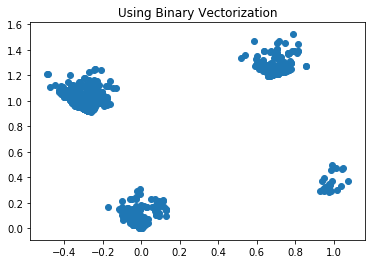

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import TruncatedSVD
vect = CountVectorizer(binary = True, stop_words = 'english')
fit = vect.fit_transform(preprocess_tweet)

lsa = TruncatedSVD(2)
fit_2d = lsa.fit_transform(fit)

print("Dimension %s -> %s" % (fit.shape,fit_2d.shape))

plt.scatter(fit_2d[:,1],fit_2d[:,0])
plt.title("Using Binary Vectorization")
plt.show()



#### Analysis : -
From the above plot its observed that there are 4 clusters of tweets that contain words with same number of occurences.


#### Q.4) Plot using Count Vectorization

Dimension (919, 2849) -> (919, 2)


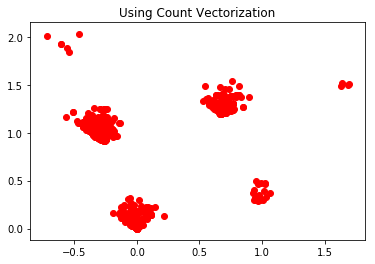

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import TruncatedSVD
vect = CountVectorizer(binary = False, stop_words = 'english')
fit = vect.fit_transform(preprocess_tweet)

lsa = TruncatedSVD(2)
fit_2d = lsa.fit_transform(fit)

print("Dimension %s -> %s" % (fit.shape,fit_2d.shape))

plt.scatter(fit_2d[:,1],fit_2d[:,0],c='r')
plt.title("Using Count Vectorization")
plt.show()

#### Analysis : -
As Count vectorizer gives the frequency of each word, it can be inferred from the above plot that there are mainly 4 clusters of tweets having words with similar frequencies. A few tweets can be found as outliers which can be interpretted as tweets containing words with higher or lower frequencies than the 4 clusters.

#### Q.4) Plot using TF-IDF Vectorization

Dimension (919, 2849) -> (919, 2)


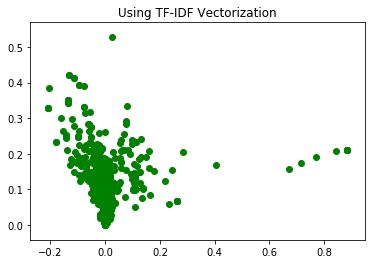

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import TruncatedSVD
vect = TfidfVectorizer(binary = False, stop_words = 'english')
fit = vect.fit_transform(preprocess_tweet)

lsa = TruncatedSVD(2)
fit_2d = lsa.fit_transform(fit)

print("Dimension %s -> %s" % (fit.shape,fit_2d.shape))

plt.scatter(fit_2d[:,1],fit_2d[:,0],c='g')
plt.title("Using TF-IDF Vectorization")
plt.show()

#### Analysis : -
From the above plot it can be observed that most of the tweets have words having similar frequencies which can be seen as a cluster. However, it can also be observed that there is a disperion of tweets from the cluster and a few outliers. This can be interpretted as, tweets containing words that occur less frequently across all tweets are assigned higher weights (due to TF-IDF) and are far apart from the cluster.

#### Q.5) Find which two hashtags appear together in a same tweet mostly?

In [12]:
co_count = CountVectorizer(binary = True, stop_words='english' )
Z = co_count.fit_transform(preprocess_tweet)

hashtag = np.array(co_count.get_feature_names())

#Find indices of feature names that contain "Hastag" keyword
indices = [i for i,item in enumerate(hashtag) if "hashtag" in item]

Zc = (Z[:,indices].T * Z[:,indices])
Zc.setdiag(0) 

order = np.argwhere(Zc == np.amax(Zc))

new = hashtag[indices]

print(np.unique(new[order]).reshape(-1,2))



[['hashtag_shutdown' 'hashtag_trumpshutdown']]


#### Q.5) Which two are the second most?

In [440]:
Zx = Zc

#Set current max value(s) to zero to compute the 2nd highest value from the matrix
for x in range(len(order)):
    i = order[x][0]
    j = order[x][1]
    Zx[i,j] = 0


new_order = np.argwhere(Zx == np.amax(Zx))

new = hashtag[indices]

print(np.unique(new[new_order]).reshape(-1,2))



[['hashtag_shutdown' 'hashtag_trump']]


#### Analysis : -
It can be observed that the highest and second highest co-occuring hashtag across all tweets are having the President Trump mentioned. Logically it adds up as for such a huge issue most of the tweets are asking/pointing the President to take an action/resolution.

#### Conclusion
* From the analysis it was observed that the most popular retweet username is 'foxnews'. Being a news channel this observation makes sense as its expected for a news channel to provide updates via Twitter.
* From the analysis on most popular hashtags it can be observed that in the given 5000 tweets the most frequently occuring hashtag is having the keyword 'Trump'. The frequency of hastag with 'Trump' is more than the tweets with keyword 'Schumer'. The hashtag 'DACA' is also popular which relates to the the current issue with respect to the US government Shutdown.
* From the Bivariate analysis using Vectorization it can be observed that the tweets can be clustered into 4 groups.
* Co-occurence analysis also showed that out of 5000 tweets the most popular co-occuring tweets are mentioning/pointing to President Trump.